In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stftest/test.csv
/kaggle/input/stftrain/train (2).csv


In [4]:
import pandas as pd

# File paths in the Kaggle environment
train_data_path = "/kaggle/input/stftrain/train (2).csv"
test_data_path = "/kaggle/input/stftest/test.csv"

# Load the datasets
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Display the first few rows of the datasets
print("Training Data:")
print(train_df.head())

print("\nTesting Data:")
print(test_df.head())

# Check dataset information
print("\nTraining Data Info:")
print(train_df.info())

print("\nTesting Data Info:")
print(test_df.info())


Training Data:
                          MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3  38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4  32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.275.1003.0           0                      7.0   
1   4.18.1807.18075     1.273.1465.0           0                      7.0   
2   4.18.1807.18075     1.275.1546.0           0                      7.0   
3  4.12.17007.18011     1.275.1141.0           0                      7.0   
4    4.13.17134.228     1.275.1283.0           0                      7.0   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0            53447.0

# EDA

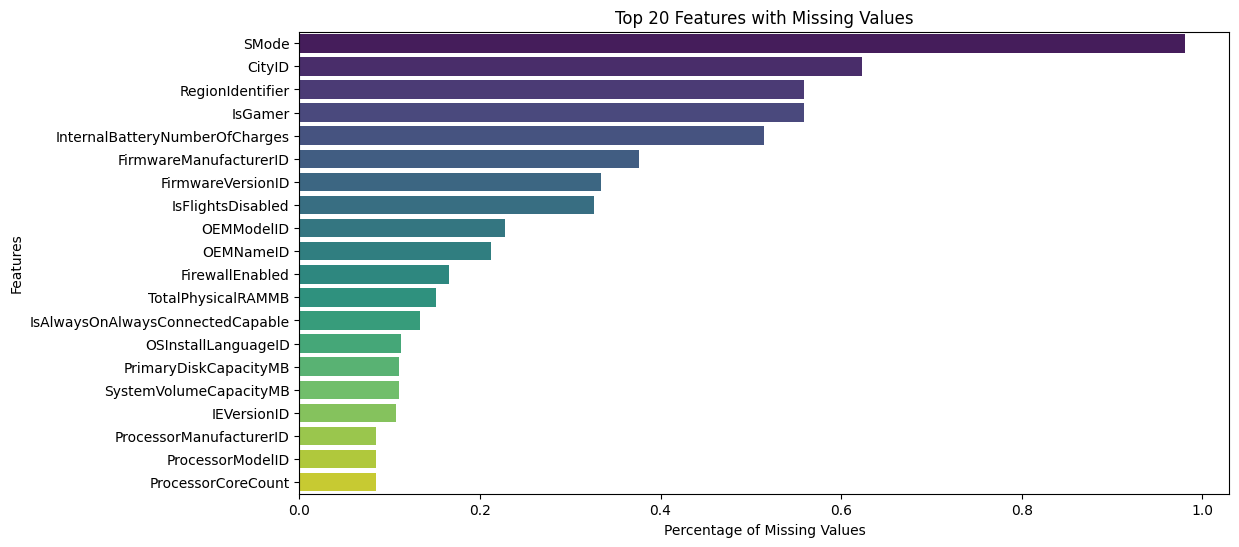

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarning related to use_inf_as_na
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Check for missing values
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train_df)) * 100

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.head(20), y=missing_percentage.head(20).index, palette="viridis")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Features")
plt.title("Top 20 Features with Missing Values")
plt.show()

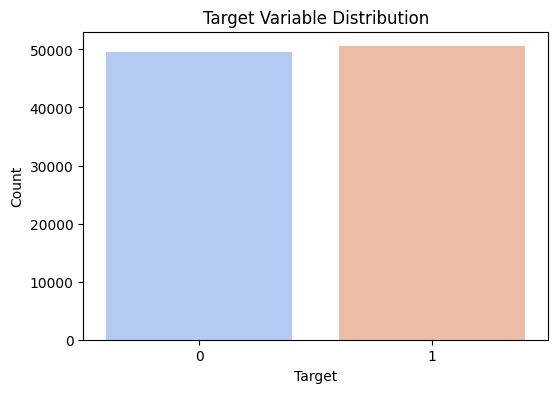

In [12]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=train_df, palette="coolwarm")
plt.title("Target Variable Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

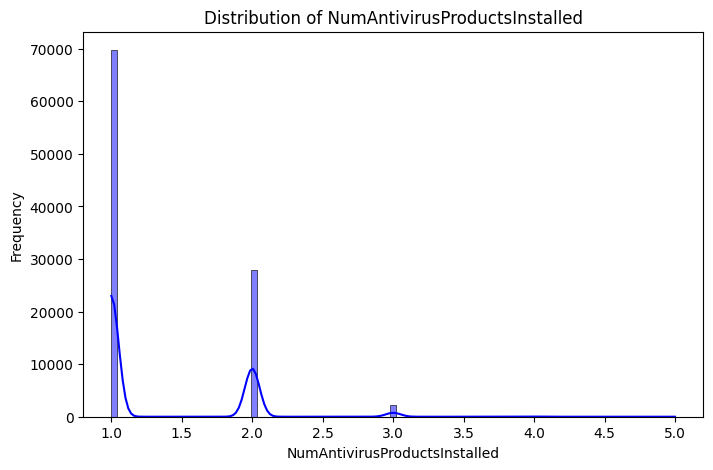

In [13]:
# Distribution of NumAntivirusProductsInstalled
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='NumAntivirusProductsInstalled', kde=True, color='blue')
plt.title("Distribution of NumAntivirusProductsInstalled")
plt.xlabel("NumAntivirusProductsInstalled")
plt.ylabel("Frequency")
plt.show()

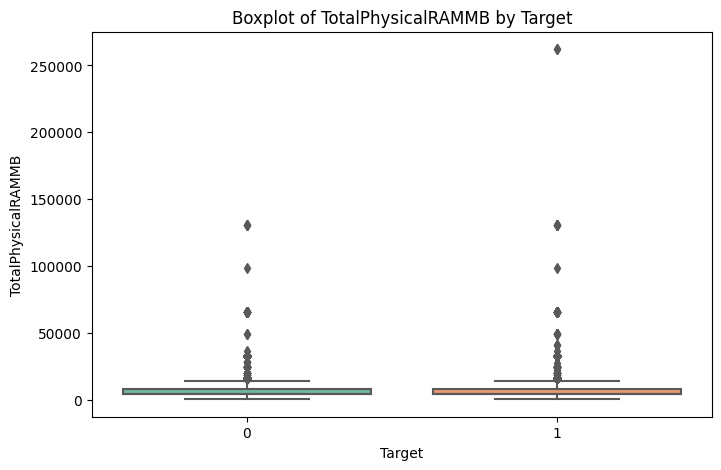

In [14]:
# Boxplot for TotalPhysicalRAMMB vs target
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x='target', y='TotalPhysicalRAMMB', palette="Set2")
plt.title("Boxplot of TotalPhysicalRAMMB by Target")
plt.xlabel("Target")
plt.ylabel("TotalPhysicalRAMMB")
plt.show()

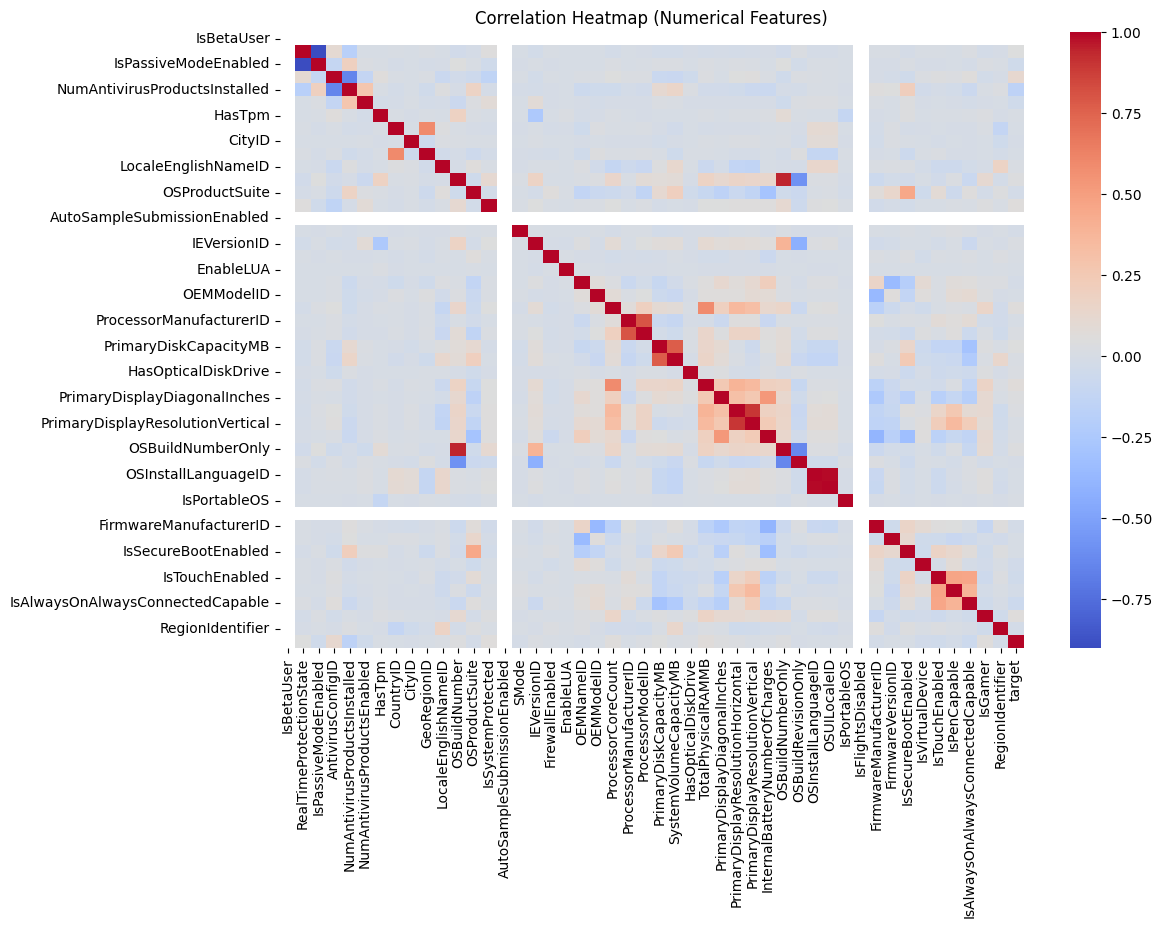

In [15]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(12, 8))
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(data=numerical_columns, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [16]:
# Display summary statistics for numerical columns
print("Summary Statistics for Numerical Columns in Training Dataset:")
print(train_df.describe().transpose().head(5))

Summary Statistics for Numerical Columns in Training Dataset:
                                  count          mean           std   min  \
IsBetaUser                     100000.0      0.000000      0.000000   0.0   
RealTimeProtectionState         99934.0      6.848430      1.015166   0.0   
IsPassiveModeEnabled           100000.0      0.017620      0.131566   0.0   
AntivirusConfigID               99924.0  47975.710440  13803.321533  39.0   
NumAntivirusProductsInstalled   99924.0      1.326528      0.520681   1.0   

                                   25%      50%      75%      max  
IsBetaUser                         0.0      0.0      0.0      0.0  
RealTimeProtectionState            7.0      7.0      7.0      8.0  
IsPassiveModeEnabled               0.0      0.0      0.0      1.0  
AntivirusConfigID              49480.0  53447.0  53447.0  70490.0  
NumAntivirusProductsInstalled      1.0      1.0      2.0      5.0  


In [17]:
# Count of unique values per feature
unique_counts = train_df.nunique().sort_values(ascending=False)
print("Top Features with Unique Values:")
print(unique_counts.head(5))

Top Features with Unique Values:
MachineID                 99835
SystemVolumeCapacityMB    46188
CityID                    16047
OEMModelID                15952
FirmwareVersionID         12299
dtype: int64


In [18]:
# Display missing value percentages
print("Top Features with Missing Percentages:")
print(missing_percentage.head(5))

Top Features with Missing Percentages:
SMode                             0.981
CityID                            0.623
RegionIdentifier                  0.559
IsGamer                           0.559
InternalBatteryNumberOfCharges    0.515
dtype: float64


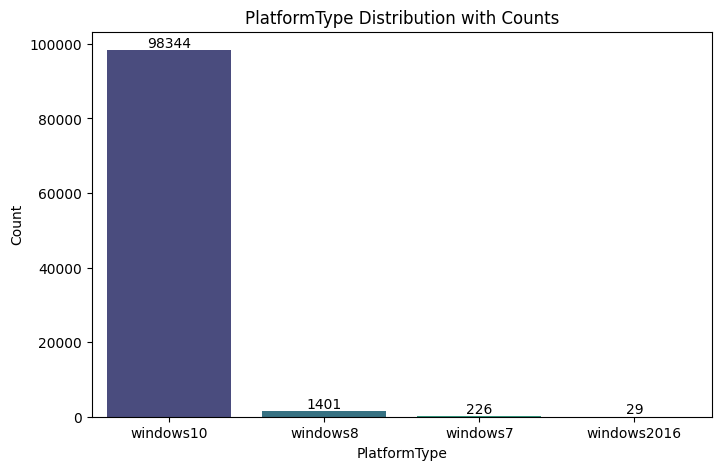

In [21]:
# PlatformType Distribution with count displayed on each bar
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=train_df, 
    x='PlatformType', 
    order=train_df['PlatformType'].value_counts().index, 
    palette="viridis"
)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Add height as a text label
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position above the bar
        ha='center', va='center', xytext=(0, 5), textcoords='offset points'
    )

# Customize plot
plt.title("PlatformType Distribution with Counts")
plt.xlabel("PlatformType")
plt.ylabel("Count")
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = train_df.drop(columns=['target', 'MachineID'])  # Drop target and MachineID
y = train_df['target']  # Target column

# Train-validation split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Training Labels Shape:", y_train.shape)
print("Validation Labels Shape:", y_val.shape)

Training Features Shape: (80000, 74)
Validation Features Shape: (20000, 74)
Training Labels Shape: (80000,)
Validation Labels Shape: (20000,)


In [28]:
# Handle missing values
for column in X_train.columns:
    if X_train[column].dtype in ['float64', 'int64']:
        # Fill numerical columns with median
        X_train[column].fillna(X_train[column].median(), inplace=True)
        X_val[column].fillna(X_train[column].median(), inplace=True)
    else:
        # Fill categorical columns with mode
        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
        X_val[column].fillna(X_train[column].mode()[0], inplace=True)

print("Missing values handled successfully!")


Missing values handled successfully!


In [30]:
# Label encode categorical features using pd.factorize
for column in X_train.select_dtypes(include=['object']).columns:
    # Create a mapping based on the training set
    X_train[column], uniques = pd.factorize(X_train[column])
    # Apply the same mapping to the validation set
    X_val[column] = X_val[column].map(lambda x: dict(enumerate(uniques)).get(x, -1))

print("Categorical features encoded successfully!")


Categorical features encoded successfully!


In [31]:
# Verify the preprocessed data
print("Preprocessed Training Data Shape:", X_train.shape)
print("Preprocessed Validation Data Shape:", X_val.shape)

# Display a sample of the preprocessed training data
print("\nSample Preprocessed Training Data:")
print(X_train.head())


Preprocessed Training Data Shape: (80000, 74)
Preprocessed Validation Data Shape: (20000, 74)

Sample Preprocessed Training Data:
       ProductName  EngineVersion  AppVersion  SignatureVersion  IsBetaUser  \
77741            1             33           0                 0           0   
69859            1             35           1                 1           0   
98748            1             32           1                 2           0   
53359            1             32           1                 3           0   
59773            1             33           1                 4           0   

       RealTimeProtectionState  IsPassiveModeEnabled  AntivirusConfigID  \
77741                      7.0                     0            53447.0   
69859                      7.0                     0            53447.0   
98748                      7.0                     0            53447.0   
53359                      7.0                     0            53447.0   
59773               